<a href="https://colab.research.google.com/github/Ken-Lau-Lab/single-cell-lectures/blob/main/notebooks2024/section05_intro_to_ST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Spatial transcriptomics

## let us look at visium data first

In [1]:
## import libraries first
! pip install scanpy
! pip install squidpy


ModuleNotFoundError: No module named 'squidpy'

In [ ]:
import squidpy as sq
import scanpy as sc

we are using visium datasets available through scanpy. This is specifically human lymph node sample

In [58]:
adata = sc.datasets.visium_sge(sample_id= "V1_Human_Lymph_Node")
adata.var_names_make_unique()

/home/simran/anaconda3/envs/pytorch/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/simran/anaconda3/envs/pytorch/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


let us look at the anndata first. What all is there?

In [59]:
adata

AnnData object with n_obs × n_vars = 4035 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

As you can see this has few additional information stored in unstructured and obsm part of the anndata. 
Here the image of the tissue and corrdinates for each spot are stored. 

## Visualizing gene expression

Now, let us look at specific genes for examples marker genes for B cells to see if we can see a pattern associated with their expression. 

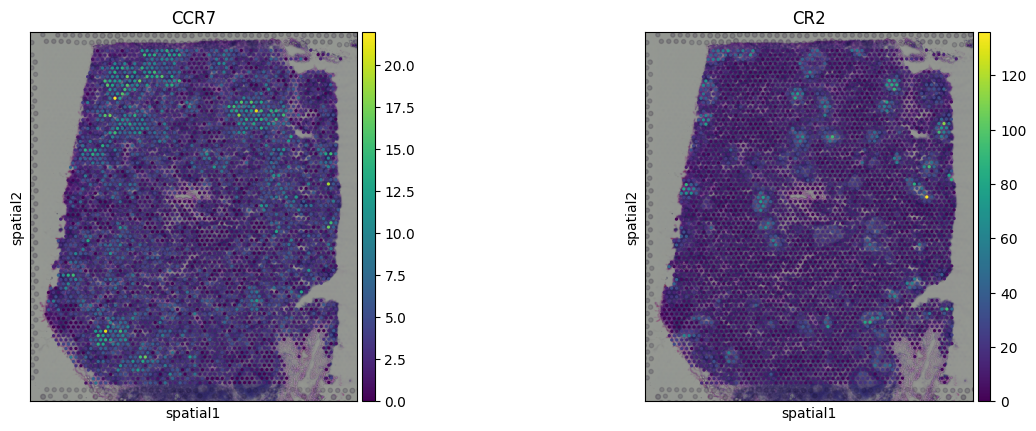

In [71]:
sc.pl.spatial(adata, color = ['CCR7','CR2'])

## Do you notice the expression is localized to certain areas of the tissue?

## Let us look at another dataset

In [76]:
adata = sq.read.visium("mouse_data/", counts_file= "CytAssist_11mm_FFPE_Mouse_Embryo_filtered_feature_bc_matrix.h5") ## we used squidpy to read the data but scanpy can be used as well. 

/home/simran/anaconda3/envs/pytorch/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/simran/anaconda3/envs/pytorch/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [77]:
adata.var_names_make_unique()

This is a mous embryo visium slide. 

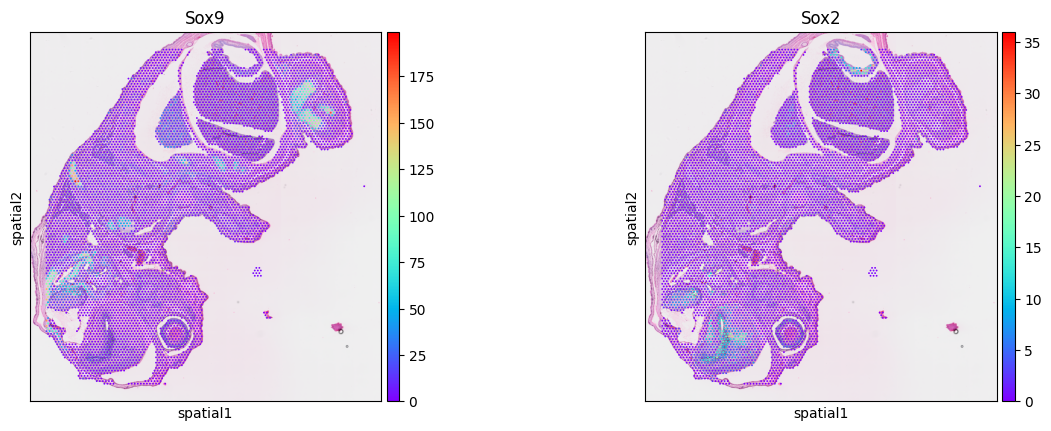

In [78]:
sc.pl.spatial(adata, color = ["Sox9", "Sox2"], cmap = "rainbow")

You can see the expression of Sox9 and Sox2 is spatially localized in specific areas of mouse embryo.

Do you notice another thing here?
The colorbar range. 
For Sox9 it goes upto 175 whereas for Sox2 it goes upto 35. What could be the reason?

## Normalization of the data

It is because the count for these two genes is different in different areas of the tissue but we cannot really compare them right now. 
Why?


because currently these are raw counts for these respective genes which include the variablity in library size for each spot is different. 
but this difference is because of both technical variability and the regional heterogeneity which can be because of different cell densities in different areas, or different types of cells that have lower or higher expression. 

to account for these differences, normalization of the data is crucial. 

For single cell RNA sequencing usually, The most common normalization procedure is to divide each cell in a gene-spot matrix by the spot total, so that every spot has the same number of counted mRNAs in the processed matrix.
but this does not apply to spatial transcriptomics due to regional heteorgeniety within the tissue. 


Thus, there are various different strategies applied for visium analysis. It is an active area of research!!

1. no normalization which mantains the biological heterogeniety of the data.
2. Using pearson residuals for normalization.
3. using image based information for normalization.

You can read more on this topic here -> https://genomemedicine.biomedcentral.com/articles/10.1186/s13073-022-01075-1#Sec14

let us perform the usual normalization that we used for single cell data here.

In [ ]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

In [ ]:
sc.pl.umap(adata, color=["clusters"], wspace=0.4)

In [ ]:
sc.pl.spatial(adata, color = 'clusters')